In [98]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [99]:
# Load the dataset:
df = pd.read_csv('amazon.csv')

In [100]:
# Preprocess the dataset
# Convert relevant columns to numeric types
columns_to_convert = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col].replace({r'[^0-9.]': ''}, regex=True), errors='coerce')

# Drop rows with NaN values
df.dropna(subset=columns_to_convert, inplace=True)

# Drop irrelevant columns
features_to_drop = ['product_link', 'img_link', 'review_content', 'user_id', 'user_name', 'review_id', 'product_id']
existing_features_to_drop = [col for col in features_to_drop if col in df.columns]
df.drop(columns=existing_features_to_drop, inplace=True)

# One-hot encode categorical columns if they exist
categorical_columns = ['category', 'product_name']
existing_categorical_columns = [col for col in categorical_columns if col in df.columns]
if existing_categorical_columns:
    df = pd.get_dummies(df, columns=existing_categorical_columns, drop_first=True)

In [101]:
# Define features and target
X = df.drop(columns=['discounted_price'])  # Features
y = df['discounted_price']  # Target
# Ensure all features are numeric
X = X.select_dtypes(include=[np.number])

In [102]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 1439063.8209227968
R-squared: 0.9507249203811845


C:\Users\Touseef Haider\AppData\Local\Temp\ipykernel_10756\2144299601.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


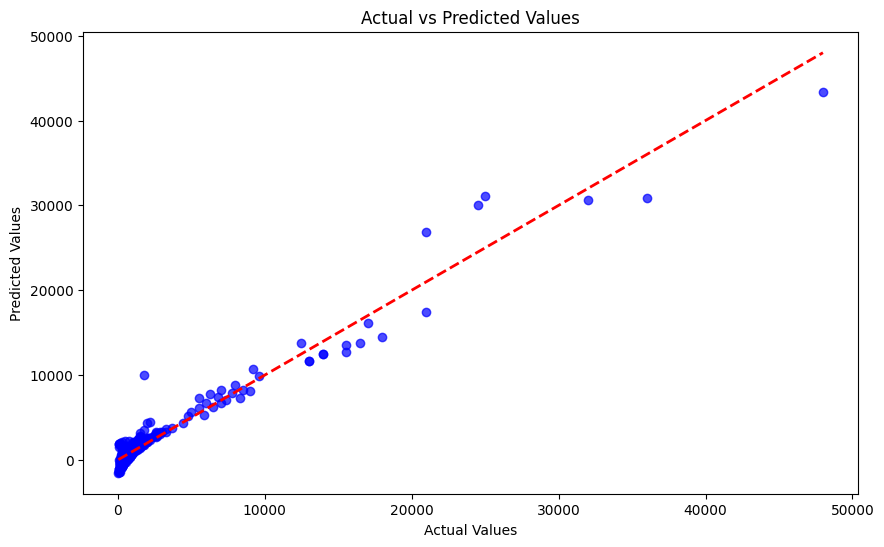

In [103]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()